In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def run_simulation(epsilon, alpha):
    K = 10
    TRUE_ACTION_VALUES = np.zeros(K)
    rewards = []

    def sample_reward(index):
        return np.random.randn() + TRUE_ACTION_VALUES[index]

    def choose_action(epsilon, q):
        explore = np.random.rand() < epsilon
        return np.random.randint(K) if explore else np.argmax(q)
    
    q = np.zeros(K)
    n = np.zeros(K)

    for i in range(1000):
        action_values_increment = np.random.normal(0, 0.01, K)
        TRUE_ACTION_VALUES += action_values_increment
        a = choose_action(epsilon, q)
        r = sample_reward(a)
        n[a] += 1
        if alpha == '1/n':
            step_alpha = 1 / n[a]  # Use a different variable name
        else:
            step_alpha = alpha
        q[a] = q[a] + step_alpha * (r - q[a])
        
        rewards.append(r)

    return rewards

In [ ]:
def run_simulation_ucb(alpha):
    K = 10
    TRUE_ACTION_VALUES = np.zeros(K)
    rewards = []
    c = 2

    def sample_reward(index):
        return np.random.randn() + TRUE_ACTION_VALUES[index]

    def choose_action(q, t):
        a = np.argmax(q + c * np.sqrt(np.log(t) / (n + 1e-5)))
        return a
    
    q = np.zeros(K)
    n = np.zeros(K)

    for i in range(1000):
        action_values_increment = np.random.normal(0, 0.01, K)
        TRUE_ACTION_VALUES += action_values_increment
        t = i + 1 
        a = choose_action(q, t)
        r = sample_reward(a)
        n[a] += 1
        if alpha == '1/n':
            step_alpha = 1 / n[a]
        else:
            step_alpha = alpha
        q[a] = q[a] + step_alpha * (r - q[a])
        
        rewards.append(r)

    return rewards


In [16]:
epsilon_greedy_all_rewards = []
for i in range(2000):
    rewards = run_simulation(.1, .1)
    epsilon_greedy_all_rewards.append(rewards)

epsilon_greedy_all_rewards = np.array(epsilon_greedy_all_rewards)
epsilon_greedy_average_reward_per_step = np.mean(epsilon_greedy_all_rewards, axis=0)

In [ ]:
ucb_all_rewards = []
for i in range(2000):
    rewards = run_simulation_ucb(.1)
    ucb_all_rewards.append(rewards)

ucb_all_rewards = np.array(ucb_all_rewards)
ucb_average_reward_per_step = np.mean(ucb_all_rewards, axis=0)

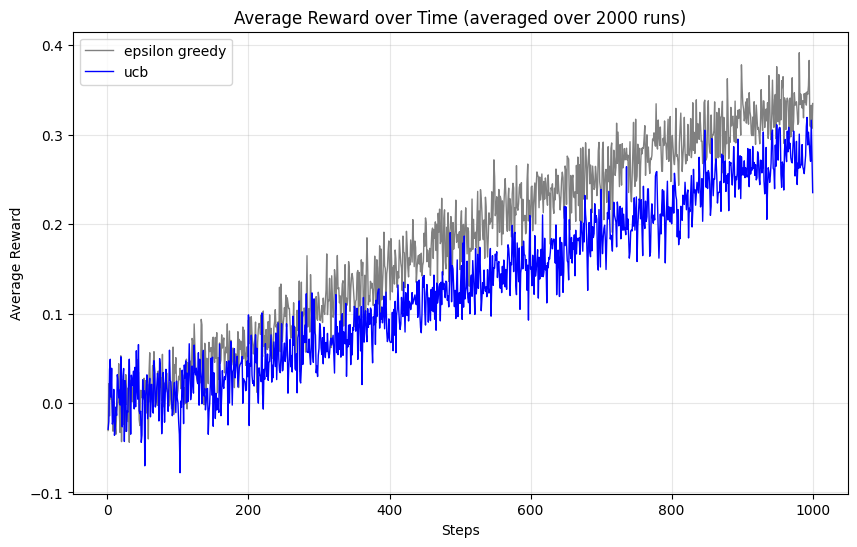

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), epsilon_greedy_average_reward_per_step, 'grey', linewidth=1, label='epsilon greedy')
plt.plot(range(1, 1001), ucb_average_reward_per_step, 'blue', linewidth=1, label='ucb')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward over Time (averaged over 2000 runs)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()